Test Accuracy: 0.9395053475935828

Classification Report:

                precision    recall  f1-score   support

        AMAZON       0.95      0.94      0.95      1584
    CLOUDFLARE       1.00      1.00      1.00      1584
       DROPBOX       0.95      0.93      0.94      1584
      FACEBOOK       0.96      0.95      0.96      1584
         GMAIL       0.89      0.90      0.90      1584
        GOOGLE       0.89      0.86      0.87      1584
          HTTP       1.00      0.99      0.99      1584
  HTTP_CONNECT       0.93      0.95      0.94      1584
    HTTP_PROXY       0.93      0.96      0.94      1584
     MICROSOFT       0.98      0.97      0.97      1584
           MSN       0.96      0.98      0.97      1584
         SKYPE       0.87      0.90      0.89      1584
           SSL       0.96      0.96      0.96      1584
       TWITTER       0.88      0.92      0.90      1584
WINDOWS_UPDATE       0.97      0.96      0.97      1584
         YAHOO       0.97      0.93      0.9

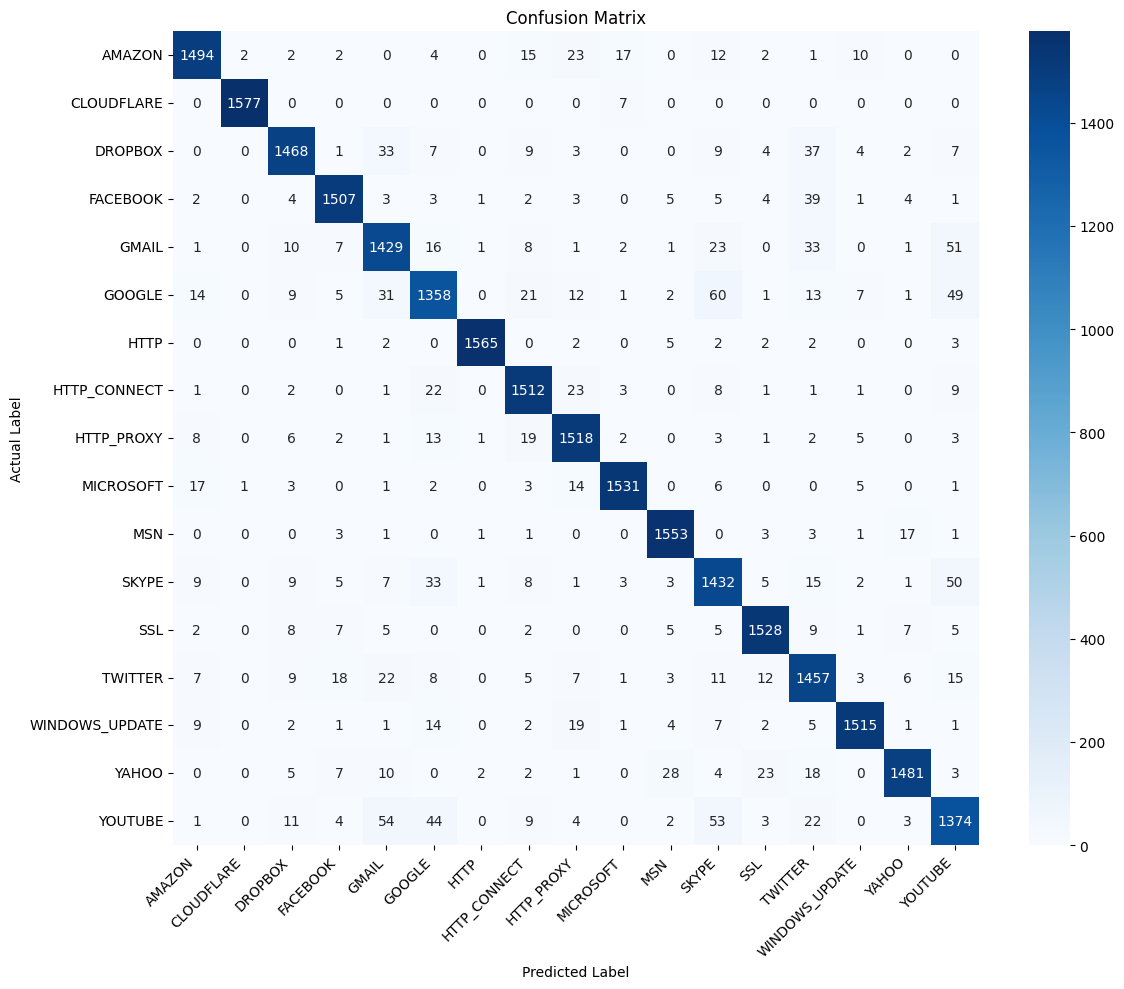

['rf_scaler.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load training data ===
df = pd.read_csv("/content/new_network_train.csv")

# === 2. Feature/Label separation ===
X = df.drop(columns=["ProtocolName"])
y = df["ProtocolName"].astype(np.int64)

# === 3. Train-Test Split (80/20 stratified) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. Train model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# === 6. Predict on test set ===
y_pred = clf.predict(X_test_scaled)

# === 7. Accuracy and report ===
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}

print("\nClassification Report:\n")
print(classification_report(
    y_test, y_pred,
    target_names=[label_map[i] for i in sorted(label_map)]
))

# === 8. Confusion Matrix Plot ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[label_map[i] for i in sorted(label_map)],
            yticklabels=[label_map[i] for i in sorted(label_map)])
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === 9. Save model and scaler ===
joblib.dump(clf, "rf_network_model.pkl")
joblib.dump(scaler, "rf_scaler.pkl")


Validation Accuracy: 0.942156862745098

Classification Report on Validation Data:

                precision    recall  f1-score   support

        AMAZON       0.95      0.95      0.95      1980
    CLOUDFLARE       1.00      1.00      1.00      1980
       DROPBOX       0.95      0.92      0.94      1980
      FACEBOOK       0.96      0.97      0.96      1980
         GMAIL       0.88      0.90      0.89      1980
        GOOGLE       0.90      0.89      0.89      1980
          HTTP       1.00      0.99      0.99      1980
  HTTP_CONNECT       0.92      0.95      0.94      1980
    HTTP_PROXY       0.93      0.95      0.94      1980
     MICROSOFT       0.99      0.97      0.98      1980
           MSN       0.98      0.98      0.98      1980
         SKYPE       0.89      0.91      0.90      1980
           SSL       0.96      0.96      0.96      1980
       TWITTER       0.89      0.91      0.90      1980
WINDOWS_UPDATE       0.97      0.94      0.96      1980
         YAHOO      

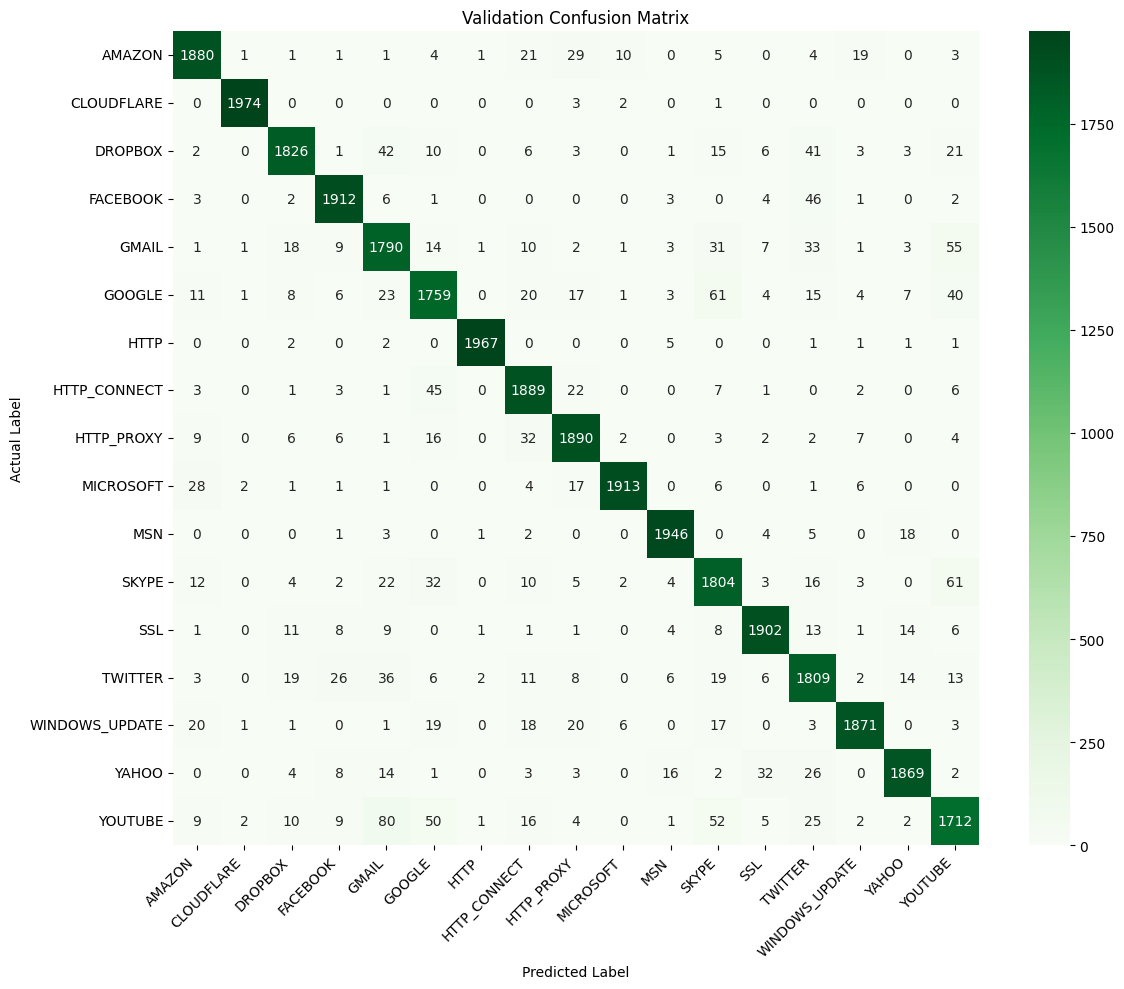

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Load validation data ===
df_val = pd.read_csv("new_network_validation.csv")
X_val = df_val.drop(columns=["ProtocolName"])
y_val = df_val["ProtocolName"].astype(np.int64)

# === 2. Load trained model and scaler ===
clf = joblib.load("rf_network_model.pkl")
scaler = joblib.load("rf_scaler.pkl")

# === 3. Scale validation data ===
X_val_scaled = scaler.transform(X_val)

# === 4. Predict and evaluate ===
y_pred_val = clf.predict(X_val_scaled)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy)

# Classification Report
label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}

print("\nClassification Report on Validation Data:\n")
print(classification_report(
    y_val, y_pred_val,
    target_names=[label_map[i] for i in sorted(label_map)]
))

# === 5. Confusion Matrix Plot ===
conf_matrix = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=[label_map[i] for i in sorted(label_map)],
            yticklabels=[label_map[i] for i in sorted(label_map)])
plt.title("Validation Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# === Label Map ===
label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"])
y = df["ProtocolName"].astype(np.int64)

# === Scale Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === Save Scaler ===
joblib.dump(scaler, "scaler.pkl")

# === Model 1: Logistic Regression ===
start = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("\n📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[label_map[i] for i in sorted(label_map)]
))
joblib.dump(log_reg, "LogisticRegression_network_model.pkl")
print("⏱️ Time taken:", round(time.time() - start, 2), "seconds")

# === Model 2: Linear SVM (Fast) ===
start = time.time()
svc = LinearSVC(max_iter=5000, random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("\n📌 Linear SVM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[label_map[i] for i in sorted(label_map)]
))
joblib.dump(svc, "LinearSVC_network_model.pkl")
print("⏱️ Time taken:", round(time.time() - start, 2), "seconds")

# === Model 3: Naive Bayes ===
start = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("\n📌 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[label_map[i] for i in sorted(label_map)]
))
joblib.dump(nb, "NaiveBayes_network_model.pkl")
print("⏱️ Time taken:", round(time.time() - start, 2), "seconds")

# === Model 4: K-Nearest Neighbors ===
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\n📌 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[label_map[i] for i in sorted(label_map)]
))
joblib.dump(knn, "KNN_network_model.pkl")
print("⏱️ Time taken:", round(time.time() - start, 2), "seconds")

# === Model 5: XGBoost ===
start = time.time()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("\n📌 XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=[label_map[i] for i in sorted(label_map)]
))
joblib.dump(xgb, "XGBoost_network_model.pkl")
print("⏱️ Time taken:", round(time.time() - start, 2), "seconds")



📌 Logistic Regression
Accuracy: 0.7932263814616756
Classification Report:
                 precision    recall  f1-score   support

        AMAZON       1.00      1.00      1.00      1584
    CLOUDFLARE       0.99      0.99      0.99      1584
       DROPBOX       0.89      0.75      0.81      1584
      FACEBOOK       0.65      0.88      0.75      1584
         GMAIL       0.69      0.68      0.68      1584
        GOOGLE       0.55      0.66      0.60      1584
          HTTP       1.00      1.00      1.00      1584
  HTTP_CONNECT       0.64      0.78      0.71      1584
    HTTP_PROXY       0.75      0.64      0.69      1584
     MICROSOFT       0.99      0.99      0.99      1584
           MSN       0.76      0.73      0.75      1584
         SKYPE       0.61      0.52      0.56      1584
           SSL       1.00      1.00      1.00      1584
       TWITTER       0.62      0.59      0.61      1584
WINDOWS_UPDATE       0.98      0.99      0.98      1584
         YAHOO       0.74  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 XGBoost
Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

        AMAZON       1.00      1.00      1.00      1584
    CLOUDFLARE       1.00      1.00      1.00      1584
       DROPBOX       1.00      1.00      1.00      1584
      FACEBOOK       1.00      1.00      1.00      1584
         GMAIL       1.00      1.00      1.00      1584
        GOOGLE       1.00      1.00      1.00      1584
          HTTP       1.00      1.00      1.00      1584
  HTTP_CONNECT       1.00      1.00      1.00      1584
    HTTP_PROXY       1.00      1.00      1.00      1584
     MICROSOFT       1.00      1.00      1.00      1584
           MSN       1.00      1.00      1.00      1584
         SKYPE       1.00      1.00      1.00      1584
           SSL       1.00      1.00      1.00      1584
       TWITTER       1.00      1.00      1.00      1584
WINDOWS_UPDATE       1.00      1.00      1.00      1584
         YAHOO       1.00      1.00      1.00      158

In [ ]:
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Shuffle labels and re-train
_, y_shuffled = shuffle(X_scaled, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_shuffled, test_size=0.2)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Sanity Check Accuracy (Shuffled Labels):", accuracy_score(y_test, y_pred))


Sanity Check Accuracy (Shuffled Labels): 0.05800653594771242


In [ ]:
# Common imports and setup
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load data
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"])
y = df["ProtocolName"].astype(np.int64)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Tensor conversion
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


ANN - Epoch 1, Loss: 1772.3229
ANN - Epoch 2, Loss: 1089.6180
ANN - Epoch 3, Loss: 887.6772
ANN - Epoch 4, Loss: 765.7792
ANN - Epoch 5, Loss: 707.5769
ANN - Epoch 6, Loss: 660.2345
ANN - Epoch 7, Loss: 618.0568
ANN - Epoch 8, Loss: 598.6947
ANN - Epoch 9, Loss: 556.7155
ANN - Epoch 10, Loss: 541.3626
ANN - Epoch 11, Loss: 525.2417
ANN - Epoch 12, Loss: 493.0614
ANN - Epoch 13, Loss: 481.0259
ANN - Epoch 14, Loss: 456.3482
ANN - Epoch 15, Loss: 448.0604
ANN - Epoch 16, Loss: 438.7188
ANN - Epoch 17, Loss: 425.6211
ANN - Epoch 18, Loss: 425.1425
ANN - Epoch 19, Loss: 408.4807
ANN - Epoch 20, Loss: 391.7581


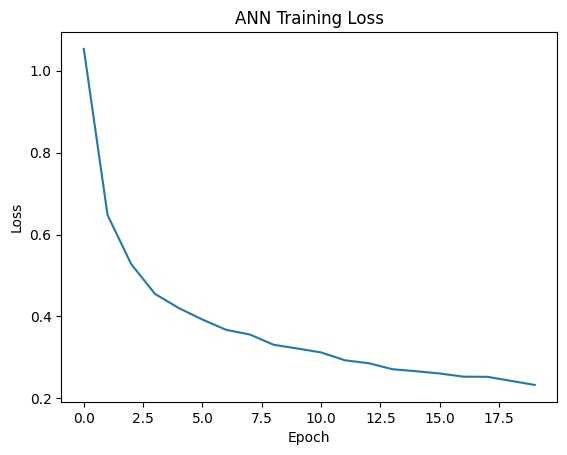

ANN Accuracy: 0.9505718954248366
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1584
           1       0.97      0.98      0.98      1584
           2       0.97      0.89      0.93      1584
           3       0.98      0.91      0.94      1584
           4       0.91      0.99      0.95      1584
           5       1.00      0.93      0.96      1584
           6       1.00      1.00      1.00      1584
           7       0.91      0.93      0.92      1584
           8       0.94      0.90      0.92      1584
           9       0.98      0.98      0.98      1584
          10       0.81      0.97      0.88      1584
          11       0.93      0.97      0.95      1584
          12       1.00      1.00      1.00      1584
          13       0.90      0.96      0.93      1584
          14       1.00      1.00      1.00      1584
          15       0.96      0.77      0.85      1584
          16       0.96      0.98      0.97     

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

def train_model(model, name):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses = []
    for epoch in range(20):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        losses.append(total_loss / len(train_loader))
        print(f"{name} - Epoch {epoch+1}, Loss: {total_loss:.4f}")

    plt.plot(losses)
    plt.title(f"{name} Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    torch.save(model.state_dict(), f"{name}_model.pt")

    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            pred = model(xb).argmax(1).cpu()
            preds.extend(pred.numpy())
            targets.extend(yb.numpy())
    print(f"{name} Accuracy:", accuracy_score(targets, preds))
    print(classification_report(targets, preds))

ann = ANN()
train_model(ann, "ANN")


CNN - Epoch 1, Loss: 1152.9442
CNN - Epoch 2, Loss: 613.8879
CNN - Epoch 3, Loss: 449.9913
CNN - Epoch 4, Loss: 384.7833
CNN - Epoch 5, Loss: 327.3351
CNN - Epoch 6, Loss: 282.3112
CNN - Epoch 7, Loss: 270.2808
CNN - Epoch 8, Loss: 255.0601
CNN - Epoch 9, Loss: 225.3263
CNN - Epoch 10, Loss: 231.9442
CNN - Epoch 11, Loss: 248.2350
CNN - Epoch 12, Loss: 191.7257
CNN - Epoch 13, Loss: 223.0683
CNN - Epoch 14, Loss: 197.0202
CNN - Epoch 15, Loss: 190.9821
CNN - Epoch 16, Loss: 176.1426
CNN - Epoch 17, Loss: 153.8684
CNN - Epoch 18, Loss: 146.9498
CNN - Epoch 19, Loss: 206.1650
CNN - Epoch 20, Loss: 211.1793


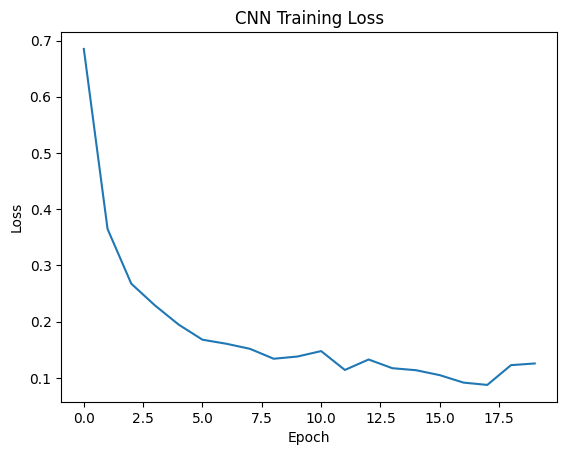

CNN Accuracy: 0.976010101010101
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1584
           1       1.00      1.00      1.00      1584
           2       0.98      0.98      0.98      1584
           3       1.00      0.99      0.99      1584
           4       0.94      0.98      0.96      1584
           5       0.95      0.97      0.96      1584
           6       1.00      1.00      1.00      1584
           7       0.99      0.94      0.96      1584
           8       0.94      0.99      0.96      1584
           9       0.99      1.00      1.00      1584
          10       0.95      0.95      0.95      1584
          11       0.97      0.95      0.96      1584
          12       0.99      1.00      1.00      1584
          13       0.98      0.97      0.97      1584
          14       1.00      1.00      1.00      1584
          15       0.95      0.95      0.95      1584
          16       0.97      0.95      0.96      

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * (input_dim // 4), 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

cnn = CNN()
train_model(cnn, "CNN")


LSTM - Epoch 1, Loss: 1617.1922
LSTM - Epoch 2, Loss: 635.8856
LSTM - Epoch 3, Loss: 437.8979
LSTM - Epoch 4, Loss: 355.6589
LSTM - Epoch 5, Loss: 301.7152
LSTM - Epoch 6, Loss: 257.2402
LSTM - Epoch 7, Loss: 216.3166
LSTM - Epoch 8, Loss: 195.4540
LSTM - Epoch 9, Loss: 172.6537
LSTM - Epoch 10, Loss: 158.0264
LSTM - Epoch 11, Loss: 145.5679
LSTM - Epoch 12, Loss: 132.0482
LSTM - Epoch 13, Loss: 128.9478
LSTM - Epoch 14, Loss: 117.9205
LSTM - Epoch 15, Loss: 122.7269
LSTM - Epoch 16, Loss: 108.7608
LSTM - Epoch 17, Loss: 105.6287
LSTM - Epoch 18, Loss: 102.6102
LSTM - Epoch 19, Loss: 97.9022
LSTM - Epoch 20, Loss: 94.1019


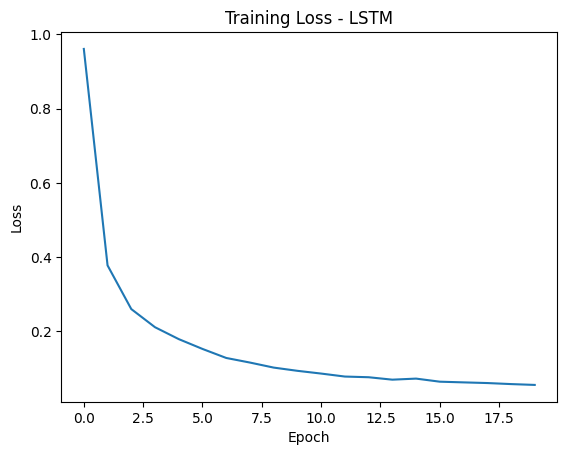

Accuracy (LSTM): 0.9916815210932858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1584
           1       1.00      1.00      1.00      1584
           2       0.99      0.99      0.99      1584
           3       1.00      0.99      1.00      1584
           4       0.99      1.00      0.99      1584
           5       1.00      1.00      1.00      1584
           6       1.00      1.00      1.00      1584
           7       0.99      0.96      0.98      1584
           8       0.97      0.99      0.98      1584
           9       1.00      1.00      1.00      1584
          10       0.99      0.96      0.97      1584
          11       0.99      1.00      1.00      1584
          12       1.00      1.00      1.00      1584
          13       0.99      0.99      0.99      1584
          14       1.00      1.00      1.00      1584
          15       0.96      0.98      0.97      1584
          16       1.00      1.00      1.00  

In [ ]:
# === LSTM Model (unchanged) ===
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, 128, batch_first=True, num_layers=2, dropout=0.3)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

# === Train Classifier Helper ===
def train_classifier(model, name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    for epoch in range(20):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss / len(train_loader))
        print(f"{name} - Epoch {epoch+1}, Loss: {total_loss:.4f}")

    # Plot loss
    plt.plot(train_losses)
    plt.title(f"Training Loss - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Save model
    torch.save(model.state_dict(), f"{name}_model.pt")

    # Evaluate
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            preds = model(xb).argmax(1).cpu()
            all_preds.extend(preds.numpy())
            all_targets.extend(yb.numpy())

    print(f"Accuracy ({name}):", accuracy_score(all_targets, all_preds))
    print(classification_report(all_targets, all_preds))

# === Train and Save LSTM ===
train_classifier(LSTMModel(), "LSTM")


Autoencoder - Epoch 1, Loss: 291.0782
Autoencoder - Epoch 2, Loss: 92.7747
Autoencoder - Epoch 3, Loss: 153.6745
Autoencoder - Epoch 4, Loss: 90.0460
Autoencoder - Epoch 5, Loss: 118.1929
Autoencoder - Epoch 6, Loss: 147.1401
Autoencoder - Epoch 7, Loss: 127.6834
Autoencoder - Epoch 8, Loss: 101.1952
Autoencoder - Epoch 9, Loss: 61.0722
Autoencoder - Epoch 10, Loss: 104.5184
Autoencoder - Epoch 11, Loss: 64.4151
Autoencoder - Epoch 12, Loss: 74.5092
Autoencoder - Epoch 13, Loss: 126.7232
Autoencoder - Epoch 14, Loss: 98.2073
Autoencoder - Epoch 15, Loss: 90.7224
Autoencoder - Epoch 16, Loss: 68.8493
Autoencoder - Epoch 17, Loss: 90.9913
Autoencoder - Epoch 18, Loss: 82.8896
Autoencoder - Epoch 19, Loss: 83.8268
Autoencoder - Epoch 20, Loss: 119.1849


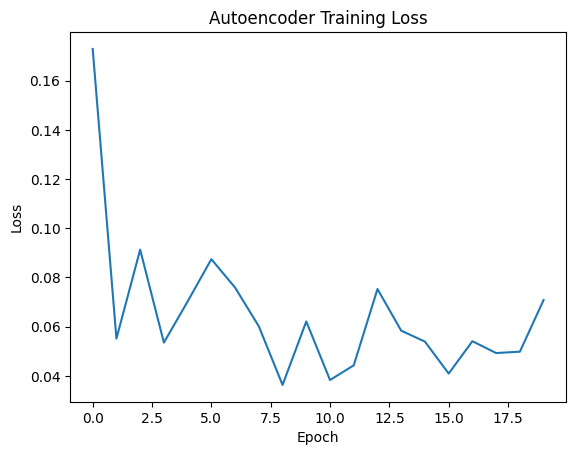

In [ ]:
# === Autoencoder ===
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# === Train Autoencoder ===
autoencoder = Autoencoder().to("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
ae_losses = []

autoencoder.train()
for epoch in range(20):
    total_loss = 0
    for xb, _ in train_loader:
        xb = xb.to(device)
        optimizer.zero_grad()
        output = autoencoder(xb)
        loss = criterion(output, xb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    ae_losses.append(total_loss / len(train_loader))
    print(f"Autoencoder - Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Plot AE Loss
plt.plot(ae_losses)
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Save AE model
torch.save(autoencoder.state_dict(), "Autoencoder_model.pt")


GAN - Epoch 1, D Loss: 1.0393, G Loss: 1.1114
GAN - Epoch 2, D Loss: 1.1866, G Loss: 0.9301
GAN - Epoch 3, D Loss: 1.2514, G Loss: 0.9868
GAN - Epoch 4, D Loss: 1.0217, G Loss: 1.0471
GAN - Epoch 5, D Loss: 0.9946, G Loss: 1.1850
GAN - Epoch 6, D Loss: 0.9254, G Loss: 1.1615
GAN - Epoch 7, D Loss: 1.0457, G Loss: 1.1528
GAN - Epoch 8, D Loss: 0.8249, G Loss: 1.2960
GAN - Epoch 9, D Loss: 1.0420, G Loss: 1.0466
GAN - Epoch 10, D Loss: 0.9745, G Loss: 1.1619
GAN - Epoch 11, D Loss: 0.9228, G Loss: 1.1766
GAN - Epoch 12, D Loss: 1.0359, G Loss: 1.0466
GAN - Epoch 13, D Loss: 0.9091, G Loss: 1.2152
GAN - Epoch 14, D Loss: 1.0627, G Loss: 1.0931
GAN - Epoch 15, D Loss: 1.0405, G Loss: 1.1155
GAN - Epoch 16, D Loss: 0.9284, G Loss: 1.1785
GAN - Epoch 17, D Loss: 1.0427, G Loss: 1.1706
GAN - Epoch 18, D Loss: 0.9094, G Loss: 1.2646
GAN - Epoch 19, D Loss: 0.8760, G Loss: 1.2293
GAN - Epoch 20, D Loss: 0.9560, G Loss: 1.2586
GAN - Epoch 21, D Loss: 0.9956, G Loss: 1.2475
GAN - Epoch 22, D Loss

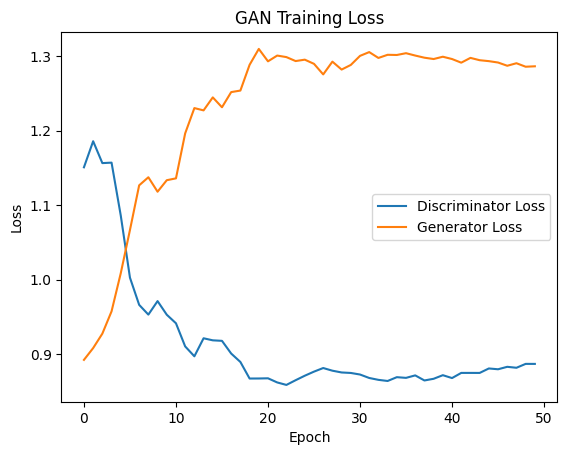

In [ ]:
# === GAN Generator and Discriminator ===
class Generator(nn.Module):
    def __init__(self, noise_dim=100):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(noise_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# === Train GAN ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator().to(device)
discriminator = Discriminator().to(device)
loss_fn = nn.BCELoss()
g_opt = optim.Adam(generator.parameters(), lr=0.0002)
d_opt = optim.Adam(discriminator.parameters(), lr=0.0002)
noise_dim = 100
gan_epochs = 50

g_losses = []
d_losses = []

for epoch in range(gan_epochs):
    total_d_loss = 0
    total_g_loss = 0
    for xb, _ in train_loader:
        xb = xb.to(device)
        real_labels = torch.ones(xb.size(0), 1).to(device)
        fake_labels = torch.zeros(xb.size(0), 1).to(device)

        # Train Discriminator
        d_opt.zero_grad()
        outputs_real = discriminator(xb)
        d_loss_real = loss_fn(outputs_real, real_labels)

        noise = torch.randn(xb.size(0), noise_dim).to(device)
        fake_data = generator(noise)
        outputs_fake = discriminator(fake_data.detach())
        d_loss_fake = loss_fn(outputs_fake, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        d_opt.step()

        # Train Generator
        g_opt.zero_grad()
        outputs = discriminator(fake_data)
        g_loss = loss_fn(outputs, real_labels)
        g_loss.backward()
        g_opt.step()

        total_d_loss += d_loss.item()
        total_g_loss += g_loss.item()

    d_losses.append(total_d_loss / len(train_loader))
    g_losses.append(total_g_loss / len(train_loader))
    print(f"GAN - Epoch {epoch+1}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

# Plot GAN Losses
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title("GAN Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Save GAN models
torch.save(generator.state_dict(), "GAN_Generator_model.pt")
torch.save(discriminator.state_dict(), "GAN_Discriminator_model.pt")


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocess ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

# === Torch Tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

# === Models ===
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512), nn.ReLU(),
            nn.Linear(512, 256), nn.ReLU(),
            nn.Linear(256, latent_dim), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, input_dim), nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Init ===
input_dim = X.shape[1]
latent_dim = 39
num_classes = len(np.unique(y))

autoencoder = Autoencoder(input_dim, latent_dim)
classifier = CNNClassifier(latent_dim, num_classes)

# === Train Autoencoder ===
optimizer_ae = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion_ae = nn.MSELoss()

for epoch in range(30):
    autoencoder.train()
    total_loss = 0
    for xb, _ in train_loader:
        optimizer_ae.zero_grad()
        reconstructed = autoencoder(xb)
        loss = criterion_ae(reconstructed, xb)
        loss.backward()
        optimizer_ae.step()
        total_loss += loss.item()
    print(f"[Autoencoder] Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# === Extract Encoded Features ===
with torch.no_grad():
    encoded_train = autoencoder.encoder(X_train_tensor)
    encoded_test = autoencoder.encoder(X_test_tensor)

# === Train Classifier ===
optimizer_clf = optim.Adam(classifier.parameters(), lr=0.001)
criterion_clf = nn.CrossEntropyLoss()

encoded_train_loader = DataLoader(TensorDataset(encoded_train, y_train_tensor), batch_size=128, shuffle=True)

for epoch in range(30):
    classifier.train()
    total_loss = 0
    for xb, yb in encoded_train_loader:
        optimizer_clf.zero_grad()
        logits = classifier(xb)
        loss = criterion_clf(logits, yb)
        loss.backward()
        optimizer_clf.step()
        total_loss += loss.item()
    print(f"[Classifier] Epoch {epoch+1}, Loss: {total_loss/len(encoded_train_loader):.4f}")

# === Evaluation ===
classifier.eval()
with torch.no_grad():
    preds = classifier(encoded_test)
    y_pred = torch.argmax(preds, dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

# === Report ===
label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(autoencoder.state_dict(), "autoencoder_modelaecnn.pth")
torch.save(classifier.state_dict(), "cnn_classifier_modelaecnn.pth")


[Autoencoder] Epoch 1, Loss: 0.7922
[Autoencoder] Epoch 2, Loss: 0.7486
[Autoencoder] Epoch 3, Loss: 0.7421
[Autoencoder] Epoch 4, Loss: 0.7394
[Autoencoder] Epoch 5, Loss: 0.7386
[Autoencoder] Epoch 6, Loss: 0.7417
[Autoencoder] Epoch 7, Loss: 0.7381
[Autoencoder] Epoch 8, Loss: 0.7350
[Autoencoder] Epoch 9, Loss: 0.7309
[Autoencoder] Epoch 10, Loss: 0.7278
[Autoencoder] Epoch 11, Loss: 0.7214
[Autoencoder] Epoch 12, Loss: 0.7182
[Autoencoder] Epoch 13, Loss: 0.7182
[Autoencoder] Epoch 14, Loss: 0.7181
[Autoencoder] Epoch 15, Loss: 0.7180
[Autoencoder] Epoch 16, Loss: 0.7171
[Autoencoder] Epoch 17, Loss: 0.7164
[Autoencoder] Epoch 18, Loss: 0.7158
[Autoencoder] Epoch 19, Loss: 0.7162
[Autoencoder] Epoch 20, Loss: 0.7157
[Autoencoder] Epoch 21, Loss: 0.7159
[Autoencoder] Epoch 22, Loss: 0.7159
[Autoencoder] Epoch 23, Loss: 0.7205
[Autoencoder] Epoch 24, Loss: 0.7157
[Autoencoder] Epoch 25, Loss: 0.7151
[Autoencoder] Epoch 26, Loss: 0.7154
[Autoencoder] Epoch 27, Loss: 0.7158
[Autoencod

autoencoder + classifier

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load and Preprocess Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

# === Convert to PyTorch Tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

# === Autoencoder with Encoder Only for Classification ===
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)

class Classifier(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# === Model Init ===
input_dim = X.shape[1]
latent_dim = 64
num_classes = len(np.unique(y))

encoder = Encoder(input_dim, latent_dim)
decoder = Decoder(latent_dim, input_dim)
classifier = Classifier(latent_dim, num_classes)

# === Joint Optimizer and Losses ===
params = list(encoder.parameters()) + list(decoder.parameters()) + list(classifier.parameters())
optimizer = optim.Adam(params, lr=0.001)
recon_loss_fn = nn.MSELoss()
clf_loss_fn = nn.CrossEntropyLoss()  # Can replace with weighted loss if needed

# === Joint Training Loop ===
print("\n🔁 Joint AE + Classifier Training")
for epoch in range(30):
    encoder.train()
    decoder.train()
    classifier.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()

        encoded = encoder(xb)
        reconstructed = decoder(encoded)
        logits = classifier(encoded)

        loss_recon = recon_loss_fn(reconstructed, xb)
        loss_clf = clf_loss_fn(logits, yb)

        loss = loss_recon + loss_clf  # weight them if needed
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Total Loss: {total_loss / len(train_loader):.4f}")

# === Evaluation ===
encoder.eval()
classifier.eval()
with torch.no_grad():
    encoded_test = encoder(X_test_tensor)
    logits_test = classifier(encoded_test)
    y_pred = torch.argmax(logits_test, dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Final Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(encoder.state_dict(), "encoder_joint.pth")
torch.save(decoder.state_dict(), "decoder_joint.pth")
torch.save(classifier.state_dict(), "classifier_joint.pth")



🔁 Joint AE + Classifier Training
Epoch 1, Total Loss: 1.8860
Epoch 2, Total Loss: 1.5089
Epoch 3, Total Loss: 1.3762
Epoch 4, Total Loss: 1.3050
Epoch 5, Total Loss: 1.2477
Epoch 6, Total Loss: 1.2338
Epoch 7, Total Loss: 1.1931
Epoch 8, Total Loss: 1.1719
Epoch 9, Total Loss: 1.1572
Epoch 10, Total Loss: 1.1418
Epoch 11, Total Loss: 1.1233
Epoch 12, Total Loss: 1.1194
Epoch 13, Total Loss: 1.1078
Epoch 14, Total Loss: 1.0986
Epoch 15, Total Loss: 1.0890
Epoch 16, Total Loss: 1.0806
Epoch 17, Total Loss: 1.0805
Epoch 18, Total Loss: 1.0672
Epoch 19, Total Loss: 1.0554
Epoch 20, Total Loss: 1.0651
Epoch 21, Total Loss: 1.0507
Epoch 22, Total Loss: 1.0372
Epoch 23, Total Loss: 1.0392
Epoch 24, Total Loss: 1.0333
Epoch 25, Total Loss: 1.0355
Epoch 26, Total Loss: 1.0226
Epoch 27, Total Loss: 1.0253
Epoch 28, Total Loss: 1.0149
Epoch 29, Total Loss: 1.0067
Epoch 30, Total Loss: 1.0160

✅ Final Accuracy: 0.9350118835412953

📊 Classification Report:
                 precision    recall  f1-

AE AE - Epoch 1, Loss: 0.2416
AE AE - Epoch 2, Loss: 0.2751
AE AE - Epoch 3, Loss: 0.1412
AE AE - Epoch 4, Loss: 0.0767
AE AE - Epoch 5, Loss: 0.1287
AE AE - Epoch 6, Loss: 0.1094
AE AE - Epoch 7, Loss: 0.1605
AE AE - Epoch 8, Loss: 0.1266
AE AE - Epoch 9, Loss: 0.1363
AE AE - Epoch 10, Loss: 0.2110
AE AE - Epoch 11, Loss: 0.1063
AE AE - Epoch 12, Loss: 0.1705
AE AE - Epoch 13, Loss: 0.1293
AE AE - Epoch 14, Loss: 0.1041
AE AE - Epoch 15, Loss: 0.1228
AE AE - Epoch 16, Loss: 0.1369
AE AE - Epoch 17, Loss: 0.1069
AE AE - Epoch 18, Loss: 0.1243
AE AE - Epoch 19, Loss: 0.1403
AE AE - Epoch 20, Loss: 0.1260
AE AE - Epoch 21, Loss: 0.0911
AE AE - Epoch 22, Loss: 0.0740
AE AE - Epoch 23, Loss: 0.0894
AE AE - Epoch 24, Loss: 0.0891
AE AE - Epoch 25, Loss: 0.0698
AE AE - Epoch 26, Loss: 0.1187
AE AE - Epoch 27, Loss: 0.1016
AE AE - Epoch 28, Loss: 0.1313
AE AE - Epoch 29, Loss: 0.1089
AE AE - Epoch 30, Loss: 0.1024


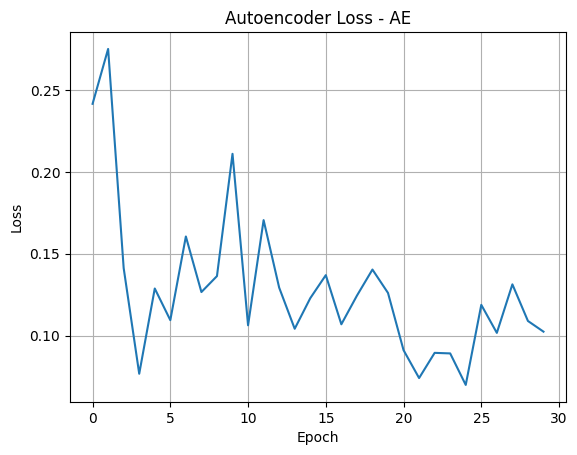

LSTM_AE - Epoch 1, Loss: 1.3583
LSTM_AE - Epoch 2, Loss: 0.9863
LSTM_AE - Epoch 3, Loss: 0.9058
LSTM_AE - Epoch 4, Loss: 0.8602
LSTM_AE - Epoch 5, Loss: 0.8243
LSTM_AE - Epoch 6, Loss: 0.7972
LSTM_AE - Epoch 7, Loss: 0.7724
LSTM_AE - Epoch 8, Loss: 0.7562
LSTM_AE - Epoch 9, Loss: 0.7351
LSTM_AE - Epoch 10, Loss: 0.7233
LSTM_AE - Epoch 11, Loss: 0.7096
LSTM_AE - Epoch 12, Loss: 0.6986
LSTM_AE - Epoch 13, Loss: 0.6859
LSTM_AE - Epoch 14, Loss: 0.6799
LSTM_AE - Epoch 15, Loss: 0.6710
LSTM_AE - Epoch 16, Loss: 0.6607
LSTM_AE - Epoch 17, Loss: 0.6530
LSTM_AE - Epoch 18, Loss: 0.6476
LSTM_AE - Epoch 19, Loss: 0.6420
LSTM_AE - Epoch 20, Loss: 0.6375


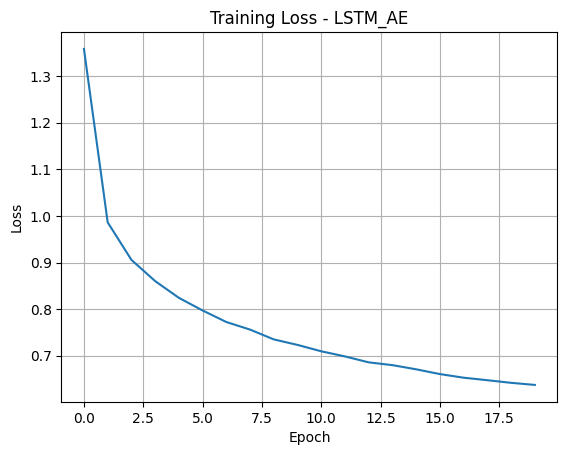

✅ Accuracy (LSTM_AE): 0.7967171717171717

📊 Classification Report:
                 precision    recall  f1-score   support

        AMAZON       0.98      0.99      0.99      1584
    CLOUDFLARE       0.95      0.98      0.96      1584
       DROPBOX       0.90      0.76      0.82      1584
      FACEBOOK       0.91      0.85      0.88      1584
         GMAIL       0.59      0.58      0.59      1584
        GOOGLE       0.60      0.44      0.51      1584
          HTTP       0.99      1.00      1.00      1584
  HTTP_CONNECT       0.65      0.75      0.70      1584
    HTTP_PROXY       0.73      0.71      0.72      1584
     MICROSOFT       0.97      0.94      0.95      1584
           MSN       0.82      0.82      0.82      1584
         SKYPE       0.59      0.65      0.62      1584
           SSL       0.97      0.98      0.98      1584
       TWITTER       0.56      0.74      0.64      1584
WINDOWS_UPDATE       0.98      0.98      0.98      1584
         YAHOO       0.82      0.81

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load and Preprocess Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# === Convert to PyTorch Tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True
)
test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor), batch_size=128
)

# === Define Autoencoder ===
input_dim = X.shape[1]
latent_dim = 64
num_classes = len(np.unique(y))

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim),
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )

    def forward(self, x):
        return self.decoder(x)

# === Train Autoencoder ===
def train_autoencoder(encoder, decoder, name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder, decoder = encoder.to(device), decoder.to(device)
    optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.001)
    criterion = nn.MSELoss()

    losses = []
    for epoch in range(30):
        encoder.train()
        decoder.train()
        total_loss = 0
        for xb, _ in train_loader:
            xb = xb.to(device)
            optimizer.zero_grad()
            encoded = encoder(xb)
            decoded = decoder(encoded)
            loss = criterion(decoded, xb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        print(f"{name} AE - Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Save models
    torch.save(encoder.state_dict(), f"{name}_encoder.pt")
    torch.save(decoder.state_dict(), f"{name}_decoder.pt")

    # Plot loss
    plt.plot(losses)
    plt.title(f"Autoencoder Loss - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

# === LSTM Model Using Encoded Features ===
class LSTMClassifier(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(latent_dim, 128, batch_first=True, num_layers=2, dropout=0.3)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch_size, seq_len=1, latent_dim)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])

# === Train Classifier Using Encoded Features ===
def train_lstm_classifier(encoder, classifier, name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder, classifier = encoder.to(device), classifier.to(device)
    encoder.eval()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(classifier.parameters(), lr=0.001)

    train_losses = []
    for epoch in range(20):
        classifier.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            with torch.no_grad():
                xb_encoded = encoder(xb)
            preds = classifier(xb_encoded)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"{name} - Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Plot loss
    plt.plot(train_losses)
    plt.title(f"Training Loss - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    # Save model
    torch.save(classifier.state_dict(), f"{name}_classifier.pt")

    # Evaluation
    classifier.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            xb_encoded = encoder(xb)
            preds = classifier(xb_encoded).argmax(1).cpu()
            all_preds.extend(preds.numpy())
            all_targets.extend(yb.numpy())

    print(f"✅ Accuracy ({name}):", accuracy_score(all_targets, all_preds))
    label_map = {
        0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
        4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
        9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
        14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
    }
    print("\n📊 Classification Report:\n", classification_report(
        all_targets, all_preds, target_names=[label_map[i] for i in sorted(label_map)]
    ))

# === Run Full Pipeline ===
encoder = Encoder(input_dim, latent_dim)
decoder = Decoder(latent_dim, input_dim)
train_autoencoder(encoder, decoder, "AE")

lstm_model = LSTMClassifier(latent_dim, num_classes)
train_lstm_classifier(encoder, lstm_model, "LSTM_AE")



In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load and Preprocess Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

# === Autoencoder + LSTM Classifier ===
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, latent_dim),
            nn.ReLU()
        )

    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)

class LSTMClassifier(nn.Module):
    def __init__(self, latent_dim, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(latent_dim, 128, batch_first=True, num_layers=2, dropout=0.3)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Convert to (batch_size, seq_len=1, latent_dim)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])  # Use last hidden state

# === Model Init ===
input_dim = X.shape[1]
latent_dim = 64
num_classes = len(np.unique(y))

encoder = Encoder(input_dim, latent_dim)
decoder = Decoder(latent_dim, input_dim)
classifier = LSTMClassifier(latent_dim, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = encoder.to(device)
decoder = decoder.to(device)
classifier = classifier.to(device)

# === Joint Optimizer and Loss ===
params = list(encoder.parameters()) + list(decoder.parameters()) + list(classifier.parameters())
optimizer = optim.Adam(params, lr=0.001)
recon_loss_fn = nn.MSELoss()
clf_loss_fn = nn.CrossEntropyLoss()

# === Joint Training Loop ===
print("\n🔁 Joint AE + LSTM Training")
for epoch in range(30):
    encoder.train()
    decoder.train()
    classifier.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()

        encoded = encoder(xb)                       # (batch, latent_dim)
        reconstructed = decoder(encoded)           # (batch, input_dim)
        logits = classifier(encoded)               # (batch, num_classes)

        loss_recon = recon_loss_fn(reconstructed, xb)
        loss_clf = clf_loss_fn(logits, yb)
        loss = loss_recon + loss_clf

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Total Loss: {total_loss / len(train_loader):.4f}")

# === Evaluation ===
encoder.eval()
classifier.eval()
with torch.no_grad():
    encoded_test = encoder(X_test_tensor.to(device))
    logits_test = classifier(encoded_test)
    y_pred = torch.argmax(logits_test, dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}

print("\n✅ Final Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(encoder.state_dict(), "encoder_lstm_joint.pth")
torch.save(decoder.state_dict(), "decoder_lstm_joint.pth")
torch.save(classifier.state_dict(), "classifier_lstm_joint.pth")



🔁 Joint AE + LSTM Training
Epoch 1, Total Loss: 2.0205
Epoch 2, Total Loss: 1.6445
Epoch 3, Total Loss: 1.5618
Epoch 4, Total Loss: 1.5220
Epoch 5, Total Loss: 1.4792
Epoch 6, Total Loss: 1.4563
Epoch 7, Total Loss: 1.4266
Epoch 8, Total Loss: 1.4158
Epoch 9, Total Loss: 1.3934
Epoch 10, Total Loss: 1.3803
Epoch 11, Total Loss: 1.3643
Epoch 12, Total Loss: 1.3437
Epoch 13, Total Loss: 1.3390
Epoch 14, Total Loss: 1.3021
Epoch 15, Total Loss: 1.2959
Epoch 16, Total Loss: 1.2551
Epoch 17, Total Loss: 1.2409
Epoch 18, Total Loss: 1.2275
Epoch 19, Total Loss: 1.1927
Epoch 20, Total Loss: 1.1882
Epoch 21, Total Loss: 1.1697
Epoch 22, Total Loss: 1.1566
Epoch 23, Total Loss: 1.1442
Epoch 24, Total Loss: 1.1312
Epoch 25, Total Loss: 1.1289
Epoch 26, Total Loss: 1.1233
Epoch 27, Total Loss: 1.1082
Epoch 28, Total Loss: 1.0966
Epoch 29, Total Loss: 1.1018
Epoch 30, Total Loss: 1.0916

✅ Final Accuracy: 0.8886660724896019

📊 Classification Report:
                 precision    recall  f1-score 

In [ ]:
# -*- coding: utf-8 -*-
"""
Experiment 1 - ISCX 5-Class Dataset
Feature Extraction using Autoencoder (VAE) + CNN Classification
Compatible with PyTorch-style dataset (new_network_train.csv)
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# === Load Dataset ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Label Names from Dataset ===
unique_labels = sorted(df["ProtocolName"].unique())
LABELS_ISCX = [str(label) for label in unique_labels]  # update if you want string names

# === Normalize Features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train-Test Split ===
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# === Convert Labels to One-Hot ===
num_classes = len(unique_labels)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# === Define Autoencoder ===
latent_dim = 39
input_dim = X.shape[1]

# Encoder
input_e = Input(shape=(input_dim,))
x = Dense(512, activation="relu")(input_e)
x = Dense(256, activation="relu")(x)
x = Dense(latent_dim, activation="relu")(x)
encoder = Model(input_e, x, name="encoder")

# Decoder
input_d = Input(shape=(latent_dim,))
x = Dense(256, activation="relu")(input_d)
x = Dense(512, activation="relu")(x)
x = Dense(input_dim, activation="sigmoid")(x)
decoder = Model(input_d, x, name="decoder")

# Autoencoder
autoencoder = Model(input_e, decoder(encoder(input_e)))
autoencoder.compile(optimizer="adam", loss="mse")

# === Train Autoencoder ===
print("\n🔁 Training Autoencoder...")
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

# === Feature Extraction ===
x_train_encoded = encoder.predict(x_train)
x_test_encoded = encoder.predict(x_test)

# === Define CNN Classifier ===
input_c = Input(shape=(latent_dim,))
x = Dense(128, activation="relu")(input_c)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
cnn = Model(input_c, x, name="CNN_classifier")
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# === Train CNN Classifier ===
print("\n🎯 Training Classifier...")
cnn.fit(x_train_encoded, y_train_cat, epochs=50, batch_size=128, validation_data=(x_test_encoded, y_test_cat))

# === Evaluate Classifier ===
y_pred = cnn.predict(x_test_encoded)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_cat, axis=1)

# === Report ===
print("\n📊 Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=LABELS_ISCX))



🔁 Training Autoencoder...
Epoch 1/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.7612 - val_loss: 0.6129
Epoch 2/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6768 - val_loss: 0.6033
Epoch 3/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7069 - val_loss: 0.6028
Epoch 4/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6935 - val_loss: 0.6020
Epoch 5/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7983 - val_loss: 0.5983
Epoch 6/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7332 - val_loss: 0.5983
Epoch 7/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7351 - val_loss: 0.5973
Epoch 8/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7144 - val_loss: 0.5974
Epoch 9/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6989 - val_loss: 0.5979
Epoch 10/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6788 - val_loss: 0.5978
Epoch 11/50
947/947 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7063 - val_loss: 0.5971
Epoch 12/50
947/947 ━━━━━

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocess ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)

# === GAN Components ===
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128), nn.ReLU(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.feature_layer = nn.Sequential(
            nn.Linear(input_dim, 256), nn.LeakyReLU(0.2),
            nn.Linear(256, 128), nn.LeakyReLU(0.2)
        )
        self.output_layer = nn.Linear(128, 1)

    def forward(self, x):
        features = self.feature_layer(x)
        return self.output_layer(features), features  # return both score & intermediate features

# === Classifier ===
class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Init Models ===
input_dim = X.shape[1]
latent_dim = 64
num_classes = len(np.unique(y))

G = Generator(latent_dim, input_dim)
D = Discriminator(input_dim)
classifier = CNNClassifier(128, num_classes)  # 128 from Discriminator's feature output

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = G.to(device)
D = D.to(device)
classifier = classifier.to(device)

# === Optimizers and Losses ===
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
loss_fn = nn.BCEWithLogitsLoss()

# === GAN Training ===
print("\n🔁 Training GAN")
for epoch in range(30):
    G.train()
    D.train()
    d_loss_total = 0
    g_loss_total = 0

    for real_x, _ in train_loader:
        real_x = real_x.to(device)
        batch_size = real_x.size(0)

        # === Train Discriminator ===
        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_x = G(noise)

        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        D_real, _ = D(real_x)
        D_fake, _ = D(fake_x.detach())

        d_loss = loss_fn(D_real, real_labels) + loss_fn(D_fake, fake_labels)
        opt_D.zero_grad()
        d_loss.backward()
        opt_D.step()

        # === Train Generator ===
        D_fake_for_G, _ = D(fake_x)
        g_loss = loss_fn(D_fake_for_G, real_labels)
        opt_G.zero_grad()
        g_loss.backward()
        opt_G.step()

        d_loss_total += d_loss.item()
        g_loss_total += g_loss.item()

    print(f"[GAN] Epoch {epoch+1}, D Loss: {d_loss_total/len(train_loader):.4f}, G Loss: {g_loss_total/len(train_loader):.4f}")

# === Extract Features using Discriminator's Hidden Layer ===
print("\n🔍 Extracting Features via Discriminator")

with torch.no_grad():
    D.eval()
    train_features = []
    for xb, _ in train_loader:
        _, features = D(xb.to(device))
        train_features.append(features.cpu())
    encoded_train = torch.cat(train_features)

    _, encoded_test = D(X_test_tensor.to(device))

# === Train Classifier ===
print("\n🎯 Training Classifier on GAN Features")
encoded_train_loader = DataLoader(TensorDataset(encoded_train, y_train_tensor), batch_size=128, shuffle=True)
optimizer_clf = optim.Adam(classifier.parameters(), lr=0.001)
criterion_clf = nn.CrossEntropyLoss()

for epoch in range(30):
    classifier.train()
    total_loss = 0
    for xb, yb in encoded_train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer_clf.zero_grad()
        logits = classifier(xb)
        loss = criterion_clf(logits, yb)
        loss.backward()
        optimizer_clf.step()
        total_loss += loss.item()
    print(f"[Classifier] Epoch {epoch+1}, Loss: {total_loss/len(encoded_train_loader):.4f}")

# === Evaluation ===
classifier.eval()
with torch.no_grad():
    y_pred = classifier(encoded_test).argmax(dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

# === Report ===
label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(G.state_dict(), "gan_generator.pth")
torch.save(D.state_dict(), "gan_discriminator.pth")
torch.save(classifier.state_dict(), "cnn_classifier_gan.pth")



🔁 Training GAN
[GAN] Epoch 1, D Loss: 0.5937, G Loss: 1.8700
[GAN] Epoch 2, D Loss: 0.3116, G Loss: 2.9017
[GAN] Epoch 3, D Loss: 0.2598, G Loss: 3.5929
[GAN] Epoch 4, D Loss: 0.2578, G Loss: 4.1449
[GAN] Epoch 5, D Loss: 0.2749, G Loss: 3.9491
[GAN] Epoch 6, D Loss: 0.3553, G Loss: 3.6276
[GAN] Epoch 7, D Loss: 0.3082, G Loss: 3.3048
[GAN] Epoch 8, D Loss: 0.3615, G Loss: 3.4590
[GAN] Epoch 9, D Loss: 0.3119, G Loss: 3.4317
[GAN] Epoch 10, D Loss: 0.3181, G Loss: 3.7291
[GAN] Epoch 11, D Loss: 0.2906, G Loss: 3.3405
[GAN] Epoch 12, D Loss: 0.3361, G Loss: 3.2045
[GAN] Epoch 13, D Loss: 0.3540, G Loss: 3.1493
[GAN] Epoch 14, D Loss: 0.4064, G Loss: 2.7960
[GAN] Epoch 15, D Loss: 0.4281, G Loss: 2.6575
[GAN] Epoch 16, D Loss: 0.4260, G Loss: 2.7979
[GAN] Epoch 17, D Loss: 0.4411, G Loss: 2.5385
[GAN] Epoch 18, D Loss: 0.4735, G Loss: 2.4821
[GAN] Epoch 19, D Loss: 0.4821, G Loss: 2.4440
[GAN] Epoch 20, D Loss: 0.5015, G Loss: 2.4017
[GAN] Epoch 21, D Loss: 0.5342, G Loss: 2.2999
[GAN] 

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from torch.utils.data import TensorDataset, DataLoader
import joblib

# === Load and Preprocess Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

# === Define GAN Components ===
input_dim = X.shape[1]
latent_dim = 100
num_classes = len(np.unique(y))

class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.adv_layer = nn.Linear(128, 1)

    def forward(self, x):
        features = self.feature_extractor(x)
        validity = torch.sigmoid(self.adv_layer(features))
        return validity, features

class CNNClassifier(nn.Module):
    def __init__(self, feature_dim, num_classes):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(feature_dim, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, features):
        return self.classifier(features)

# === Initialize Models ===
G = Generator(latent_dim, input_dim)
D = Discriminator(input_dim)
C = CNNClassifier(128, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G.to(device)
D.to(device)
C.to(device)

# === Optimizers and Loss ===
criterion_adv = nn.BCELoss()
criterion_clf = nn.CrossEntropyLoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)
optimizer_C = optim.Adam(C.parameters(), lr=0.001)

# === GAN + CNN Training Loop ===
for epoch in range(30):
    G.train()
    D.train()
    C.train()
    total_d_loss, total_g_loss, total_c_loss = 0, 0, 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        batch_size = xb.size(0)
        valid = torch.ones((batch_size, 1), device=device)
        fake = torch.zeros((batch_size, 1), device=device)

        # --- Train Discriminator ---
        optimizer_D.zero_grad()
        real_validity, _ = D(xb)
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z).detach()
        fake_validity, _ = D(fake_data)
        d_loss = criterion_adv(real_validity, valid) + criterion_adv(fake_validity, fake)
        d_loss.backward()
        optimizer_D.step()

        # --- Train Generator ---
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_data = G(z)
        fake_validity, _ = D(gen_data)
        g_loss = criterion_adv(fake_validity, valid)
        g_loss.backward()
        optimizer_G.step()

        # --- Train Classifier on Discriminator Features ---
        optimizer_C.zero_grad()
        _, real_features = D(xb)
        logits = C(real_features)
        c_loss = criterion_clf(logits, yb)
        c_loss.backward()
        optimizer_C.step()

        total_d_loss += d_loss.item()
        total_g_loss += g_loss.item()
        total_c_loss += c_loss.item()

    print(f"[Epoch {epoch+1}] D Loss: {total_d_loss:.4f}, G Loss: {total_g_loss:.4f}, C Loss: {total_c_loss:.4f}")

# === Evaluation ===
C.eval()
D.eval()
with torch.no_grad():
    all_preds, all_labels = [], []
    for xb, yb in test_loader:
        xb = xb.to(device)
        _, features = D(xb)
        preds = C(features).argmax(1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(yb.numpy())

# === Results ===
print("\n✅ Accuracy:", accuracy_score(all_labels, all_preds))
print("\n📊 Classification Report:\n", classification_report(all_labels, all_preds, target_names=[
    'AMAZON', 'CLOUDFLARE', 'DROPBOX', 'FACEBOOK', 'GMAIL', 'GOOGLE', 'HTTP',
    'HTTP_CONNECT', 'HTTP_PROXY', 'MICROSOFT', 'MSN', 'SKYPE', 'SSL', 'TWITTER',
    'WINDOWS_UPDATE', 'YAHOO', 'YOUTUBE'
]))

# === Save Models ===
torch.save(G.state_dict(), "gan_generator.pth")
torch.save(D.state_dict(), "gan_discriminator.pth")
torch.save(C.state_dict(), "cnn_classifier_from_gan.pth")


[Epoch 1] D Loss: 650.4626, G Loss: 1262.0341, C Loss: 2066.6872
[Epoch 2] D Loss: 372.2422, G Loss: 2163.4534, C Loss: 2009.2848
[Epoch 3] D Loss: 319.9067, G Loss: 3185.8795, C Loss: 1929.4002
[Epoch 4] D Loss: 449.1309, G Loss: 2167.0979, C Loss: 1770.2761
[Epoch 5] D Loss: 456.2914, G Loss: 2225.8156, C Loss: 1622.5280
[Epoch 6] D Loss: 572.1260, G Loss: 2118.3151, C Loss: 1681.3205
[Epoch 7] D Loss: 548.1544, G Loss: 1994.4687, C Loss: 1610.2917
[Epoch 8] D Loss: 635.7547, G Loss: 1702.9632, C Loss: 1591.3502
[Epoch 9] D Loss: 616.5087, G Loss: 1707.1225, C Loss: 1561.0549
[Epoch 10] D Loss: 640.9964, G Loss: 1656.4459, C Loss: 1581.6464
[Epoch 11] D Loss: 642.9119, G Loss: 1619.6880, C Loss: 1533.2743
[Epoch 12] D Loss: 590.0898, G Loss: 1682.1014, C Loss: 1510.6416
[Epoch 13] D Loss: 611.5250, G Loss: 1643.1128, C Loss: 1492.8307
[Epoch 14] D Loss: 581.4612, G Loss: 1692.0749, C Loss: 1496.5496
[Epoch 15] D Loss: 569.3758, G Loss: 1695.8862, C Loss: 1461.5221
[Epoch 16] D Loss: 

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

input_dim = X.shape[1]
num_classes = len(np.unique(y))
latent_dim = 100
label_smooth_real = 0.9  # Label smoothing

# === One-hot encoder ===
def one_hot(labels, num_classes):
    return torch.eye(num_classes, device=labels.device)[labels]

# === Focal Loss ===
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super().__init__()
        self.gamma = gamma

    def forward(self, input, target):
        logpt = F.log_softmax(input, dim=1)
        pt = torch.exp(logpt)
        loss = (1 - pt) ** self.gamma * logpt
        return F.nll_loss(loss, target)

# === Generator ===
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
        )

    def forward(self, noise, labels):
        labels = one_hot(labels, num_classes).to(noise.device)
        x = torch.cat([noise, labels], dim=1)
        return self.model(x)

# === Discriminator ===
class Discriminator(nn.Module):
    def __init__(self, input_dim, label_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, data, labels):
        labels = one_hot(labels, num_classes).to(data.device)
        x = torch.cat([data, labels], dim=1)
        return self.model(x)

# === Classifier ===
class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Init Models ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(latent_dim, num_classes, input_dim).to(device)
D = Discriminator(input_dim, num_classes).to(device)
clf = CNNClassifier(input_dim, num_classes).to(device)

# === Losses and Optimizers ===
bce = nn.BCELoss()
focal_loss = FocalLoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
opt_C = optim.Adam(clf.parameters(), lr=0.001)

# === Training Loop ===
epochs = 30
for epoch in range(epochs):
    G.train(); D.train(); clf.train()
    total_d_loss, total_g_loss, total_c_loss = 0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        batch_size = xb.size(0)

        # === Train Discriminator ===
        real_labels = torch.full((batch_size, 1), label_smooth_real).to(device)
        fake_labels = torch.zeros((batch_size, 1)).to(device)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z, yb)

        D_real = D(xb, yb)
        D_fake = D(fake_data.detach(), yb)

        loss_D = bce(D_real, real_labels) + bce(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # === Train Generator ===
        D_fake = D(fake_data, yb)
        loss_G = bce(D_fake, real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

        # === Train Classifier ===
        preds = clf(xb)
        loss_C = focal_loss(preds, yb)
        opt_C.zero_grad()
        loss_C.backward()
        opt_C.step()

        total_d_loss += loss_D.item()
        total_g_loss += loss_G.item()
        total_c_loss += loss_C.item()

    print(f"[Epoch {epoch+1}] D Loss: {total_d_loss:.4f}, G Loss: {total_g_loss:.4f}, C Loss: {total_c_loss:.4f}")

# === Evaluation ===
clf.eval()
with torch.no_grad():
    preds = clf(X_test_tensor.to(device))
    y_pred = preds.argmax(dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(G.state_dict(), "generator_cgan.pth")
torch.save(D.state_dict(), "discriminator_cgan.pth")
torch.save(clf.state_dict(), "classifier_cgan.pth")


[Epoch 1] D Loss: 930.0924, G Loss: 1174.8812, C Loss: 783.6729
[Epoch 2] D Loss: 959.2875, G Loss: 1011.8796, C Loss: 506.7811
[Epoch 3] D Loss: 847.5900, G Loss: 1278.6596, C Loss: 458.3165
[Epoch 4] D Loss: 810.0935, G Loss: 1333.1608, C Loss: 438.0040
[Epoch 5] D Loss: 812.4623, G Loss: 1342.2056, C Loss: 426.5671
[Epoch 6] D Loss: 869.1172, G Loss: 1224.9060, C Loss: 415.5428
[Epoch 7] D Loss: 863.8345, G Loss: 1212.1490, C Loss: 407.6835
[Epoch 8] D Loss: 856.3151, G Loss: 1226.4795, C Loss: 392.5186
[Epoch 9] D Loss: 877.9129, G Loss: 1195.0063, C Loss: 381.6577
[Epoch 10] D Loss: 887.9599, G Loss: 1173.4643, C Loss: 374.8924
[Epoch 11] D Loss: 884.5383, G Loss: 1159.3888, C Loss: 364.0255
[Epoch 12] D Loss: 867.5095, G Loss: 1194.6425, C Loss: 344.5667
[Epoch 13] D Loss: 889.2530, G Loss: 1159.5213, C Loss: 336.6594
[Epoch 14] D Loss: 900.0261, G Loss: 1146.9873, C Loss: 328.4772
[Epoch 15] D Loss: 895.6947, G Loss: 1163.9884, C Loss: 317.4813
[Epoch 16] D Loss: 894.4110, G Los

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

input_dim = X.shape[1]
num_classes = len(np.unique(y))
latent_dim = 100
label_smooth_real = 0.9

# === One-hot encoder ===
def one_hot(labels, num_classes):
    return torch.eye(num_classes, device=labels.device)[labels]

# === Focal Loss ===
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super().__init__()
        self.gamma = gamma

    def forward(self, input, target):
        logpt = F.log_softmax(input, dim=1)
        pt = torch.exp(logpt)
        loss = (1 - pt) ** self.gamma * logpt
        return F.nll_loss(loss, target)

# === Generator ===
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )

    def forward(self, noise, labels):
        labels = one_hot(labels, num_classes).to(noise.device)
        x = torch.cat([noise, labels], dim=1)
        return self.model(x)

# === Discriminator ===
class Discriminator(nn.Module):
    def __init__(self, input_dim, label_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, data, labels):
        labels = one_hot(labels, num_classes).to(data.device)
        x = torch.cat([data, labels], dim=1)
        return self.model(x)

# === Classifier ===
class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Init Models ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(latent_dim, num_classes, input_dim).to(device)
D = Discriminator(input_dim, num_classes).to(device)
clf = CNNClassifier(input_dim, num_classes).to(device)

# === Losses and Optimizers ===
bce = nn.BCELoss()
focal_loss = FocalLoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
opt_C = optim.Adam(clf.parameters(), lr=0.001)

# Schedulers
scheduler_C = optim.lr_scheduler.StepLR(opt_C, step_size=15, gamma=0.5)

# === Training Loop ===
epochs = 100
for epoch in range(epochs):
    G.train(); D.train(); clf.train()
    total_d_loss, total_g_loss, total_c_loss = 0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        batch_size = xb.size(0)

        # === Train Discriminator ===
        real_labels = torch.full((batch_size, 1), label_smooth_real).to(device)
        fake_labels = torch.zeros((batch_size, 1)).to(device)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z, yb)

        D_real = D(xb, yb)
        D_fake = D(fake_data.detach(), yb)

        loss_D = bce(D_real, real_labels) + bce(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # === Train Generator ===
        D_fake = D(fake_data, yb)
        loss_G = bce(D_fake, real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

        # === Train Classifier on real + fake ===
        synthetic_data = G(torch.randn(batch_size, latent_dim).to(device), yb)
        combined_data = torch.cat([xb, synthetic_data], dim=0)
        combined_labels = torch.cat([yb, yb], dim=0)

        preds = clf(combined_data)
        loss_C = focal_loss(preds, combined_labels)
        opt_C.zero_grad()
        loss_C.backward()
        opt_C.step()

        total_d_loss += loss_D.item()
        total_g_loss += loss_G.item()
        total_c_loss += loss_C.item()

    scheduler_C.step()
    print(f"[Epoch {epoch+1}] D Loss: {total_d_loss:.4f}, G Loss: {total_g_loss:.4f}, C Loss: {total_c_loss:.4f}")

# === Evaluation ===
clf.eval()
with torch.no_grad():
    preds = clf(X_test_tensor.to(device))
    y_pred = preds.argmax(dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(G.state_dict(), "generator_cgan2.pth")
torch.save(D.state_dict(), "discriminator_cgan2.pth")
torch.save(clf.state_dict(), "classifier_cgan2.pth")


[Epoch 1] D Loss: 658.8518, G Loss: 2413.1014, C Loss: 1437.5552
[Epoch 2] D Loss: 656.2894, G Loss: 2336.0910, C Loss: 1322.8202
[Epoch 3] D Loss: 652.2607, G Loss: 2153.4269, C Loss: 1275.4349
[Epoch 4] D Loss: 667.2299, G Loss: 2128.5513, C Loss: 944.4518
[Epoch 5] D Loss: 656.3497, G Loss: 2019.6076, C Loss: 699.2260
[Epoch 6] D Loss: 699.9287, G Loss: 1833.4889, C Loss: 591.2645
[Epoch 7] D Loss: 744.1338, G Loss: 1701.0849, C Loss: 484.7723
[Epoch 8] D Loss: 777.9539, G Loss: 1671.4868, C Loss: 459.4634
[Epoch 9] D Loss: 790.6512, G Loss: 1552.3411, C Loss: 456.4172
[Epoch 10] D Loss: 793.9263, G Loss: 1565.2438, C Loss: 438.2249
[Epoch 11] D Loss: 795.9860, G Loss: 1593.8712, C Loss: 442.2619
[Epoch 12] D Loss: 793.4390, G Loss: 1587.5938, C Loss: 400.5894
[Epoch 13] D Loss: 802.1005, G Loss: 1610.5773, C Loss: 370.0211
[Epoch 14] D Loss: 807.5804, G Loss: 1599.9068, C Loss: 347.7442
[Epoch 15] D Loss: 824.2466, G Loss: 1555.1756, C Loss: 332.6735
[Epoch 16] D Loss: 830.7850, G 

gans + cnn

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

input_dim = X.shape[1]
num_classes = len(np.unique(y))
latent_dim = 100
label_smooth_real = 0.9

# === One-hot encoder ===
def one_hot(labels, num_classes):
    return torch.eye(num_classes, device=labels.device)[labels]

# === Focal Loss ===
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super().__init__()
        self.gamma = gamma

    def forward(self, input, target):
        logpt = F.log_softmax(input, dim=1)
        pt = torch.exp(logpt)
        loss = (1 - pt) ** self.gamma * logpt
        return F.nll_loss(loss, target)

# === Generator ===
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )

    def forward(self, noise, labels):
        labels = one_hot(labels, num_classes).to(noise.device)
        x = torch.cat([noise, labels], dim=1)
        return self.model(x)

# === Discriminator ===
class Discriminator(nn.Module):
    def __init__(self, input_dim, label_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, data, labels):
        labels = one_hot(labels, num_classes).to(data.device)
        x = torch.cat([data, labels], dim=1)
        return self.model(x)

# === External CNN Classifier ===
class ExternalCNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # shape: (B, 1, input_dim)
        x = self.conv(x)
        return self.fc(x)

# === Init Models ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(latent_dim, num_classes, input_dim).to(device)
D = Discriminator(input_dim, num_classes).to(device)
cnn = ExternalCNNClassifier(input_dim, num_classes).to(device)

# === Losses and Optimizers ===
bce = nn.BCELoss()
focal_loss = FocalLoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
opt_cnn = optim.Adam(cnn.parameters(), lr=0.001)
scheduler_cnn = optim.lr_scheduler.StepLR(opt_cnn, step_size=20, gamma=0.5)

# === Training Loop ===
epochs = 30
for epoch in range(epochs):
    G.train(); D.train(); cnn.train()
    total_d_loss, total_g_loss, total_c_loss = 0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        batch_size = xb.size(0)

        # === Discriminator ===
        real_labels = torch.full((batch_size, 1), label_smooth_real).to(device)
        fake_labels = torch.zeros((batch_size, 1)).to(device)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z, yb)

        D_real = D(xb, yb)
        D_fake = D(fake_data.detach(), yb)

        loss_D = bce(D_real, real_labels) + bce(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # === Generator ===
        D_fake = D(fake_data, yb)
        loss_G = bce(D_fake, real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

        # === CNN Classifier (on real + synthetic) ===
        synthetic_data = G(torch.randn(batch_size, latent_dim).to(device), yb)
        combined_data = torch.cat([xb, synthetic_data], dim=0)
        combined_labels = torch.cat([yb, yb], dim=0)

        preds = cnn(combined_data)
        loss_C = focal_loss(preds, combined_labels)
        opt_cnn.zero_grad()
        loss_C.backward()
        opt_cnn.step()

        total_d_loss += loss_D.item()
        total_g_loss += loss_G.item()
        total_c_loss += loss_C.item()

    scheduler_cnn.step()
    print(f"[Epoch {epoch+1}] D Loss: {total_d_loss:.4f}, G Loss: {total_g_loss:.4f}, CNN Loss: {total_c_loss:.4f}")

# === Evaluation ===
cnn.eval()
with torch.no_grad():
    preds = cnn(X_test_tensor.to(device))
    y_pred = preds.argmax(dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(G.state_dict(), "generator_hybrid.pth")
torch.save(D.state_dict(), "discriminator_hybrid.pth")
torch.save(cnn.state_dict(), "external_cnn_classifier.pth")


[Epoch 1] D Loss: 648.7271, G Loss: 2518.7926, CNN Loss: 1954.2274
[Epoch 2] D Loss: 686.8434, G Loss: 2181.1571, CNN Loss: 1499.2735
[Epoch 3] D Loss: 697.5115, G Loss: 1997.1598, CNN Loss: 1380.7833
[Epoch 4] D Loss: 678.3925, G Loss: 1980.7752, CNN Loss: 1172.0529
[Epoch 5] D Loss: 691.0861, G Loss: 1861.9794, CNN Loss: 859.2755
[Epoch 6] D Loss: 762.0134, G Loss: 1695.1658, CNN Loss: 763.5790
[Epoch 7] D Loss: 813.3892, G Loss: 1491.3914, CNN Loss: 713.0444
[Epoch 8] D Loss: 812.4965, G Loss: 1481.2946, CNN Loss: 654.2534
[Epoch 9] D Loss: 814.3375, G Loss: 1478.2671, CNN Loss: 620.6471
[Epoch 10] D Loss: 849.5550, G Loss: 1403.8000, CNN Loss: 587.8980
[Epoch 11] D Loss: 853.8399, G Loss: 1391.9283, CNN Loss: 558.9915
[Epoch 12] D Loss: 839.1416, G Loss: 1393.4365, CNN Loss: 543.3285
[Epoch 13] D Loss: 835.6576, G Loss: 1432.2651, CNN Loss: 503.5657
[Epoch 14] D Loss: 851.2236, G Loss: 1392.2576, CNN Loss: 474.6225
[Epoch 15] D Loss: 841.7678, G Loss: 1417.1485, CNN Loss: 442.4366


semi supervised gans

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === Load Data ===
df = pd.read_csv("new_network_train.csv")
X = df.drop(columns=["ProtocolName"]).values
y = df["ProtocolName"].astype(np.int64).values

# === Preprocessing ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=128)

input_dim = X.shape[1]
num_classes = len(np.unique(y))
latent_dim = 100
label_smooth_real = 0.9

# === One-hot encoder ===
def one_hot(labels, num_classes):
    return torch.eye(num_classes, device=labels.device)[labels]

# === Focal Loss ===
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0):
        super().__init__()
        self.gamma = gamma

    def forward(self, input, target):
        logpt = F.log_softmax(input, dim=1)
        pt = torch.exp(logpt)
        loss = (1 - pt) ** self.gamma * logpt
        return F.nll_loss(loss, target)

# === Generator ===
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )

    def forward(self, noise, labels):
        labels = one_hot(labels, num_classes).to(noise.device)
        x = torch.cat([noise, labels], dim=1)
        return self.model(x)

# === Discriminator ===
class Discriminator(nn.Module):
    def __init__(self, input_dim, label_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, data, labels):
        labels = one_hot(labels, num_classes).to(data.device)
        x = torch.cat([data, labels], dim=1)
        return self.model(x)

# === CNN Classifier ===
class CNNClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Pseudo-labeling function ===
def get_confident_pseudo_labels(model, data, threshold=0.9):
    model.eval()
    data = data.to(device)  # Ensure data is on the same device
    with torch.no_grad():
        outputs = model(data)
        probs = F.softmax(outputs, dim=1)
        confidences, predictions = torch.max(probs, dim=1)
        mask = confidences >= threshold
        confident_data = data[mask]
        confident_labels = predictions[mask]
    return confident_data.cpu(), confident_labels.cpu()

# === Init Models ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(latent_dim, num_classes, input_dim).to(device)
D = Discriminator(input_dim, num_classes).to(device)
clf = CNNClassifier(input_dim, num_classes).to(device)

# === Losses and Optimizers ===
bce = nn.BCELoss()
focal_loss = FocalLoss()
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
opt_C = optim.Adam(clf.parameters(), lr=0.001)
scheduler_C = optim.lr_scheduler.StepLR(opt_C, step_size=15, gamma=0.5)

# === Training Loop ===
epochs = 100
for epoch in range(epochs):
    G.train(); D.train(); clf.train()
    total_d_loss, total_g_loss, total_c_loss = 0, 0, 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        batch_size = xb.size(0)

        # === Train Discriminator ===
        real_labels = torch.full((batch_size, 1), label_smooth_real).to(device)
        fake_labels = torch.zeros((batch_size, 1)).to(device)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_data = G(z, yb)

        D_real = D(xb, yb)
        D_fake = D(fake_data.detach(), yb)

        loss_D = bce(D_real, real_labels) + bce(D_fake, fake_labels)
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # === Train Generator ===
        D_fake = D(fake_data, yb)
        loss_G = bce(D_fake, real_labels)
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

        # === Train Classifier on real + fake ===
        synthetic_data = G(torch.randn(batch_size, latent_dim).to(device), yb)
        combined_data = torch.cat([xb, synthetic_data], dim=0)
        combined_labels = torch.cat([yb, yb], dim=0)

        preds = clf(combined_data)
        loss_C = focal_loss(preds, combined_labels)
        opt_C.zero_grad()
        loss_C.backward()
        opt_C.step()

        total_d_loss += loss_D.item()
        total_g_loss += loss_G.item()
        total_c_loss += loss_C.item()

    # === Semi-Supervised Learning: Pseudo-labeling ===
    pseudo_data, pseudo_labels = get_confident_pseudo_labels(clf, X_test_tensor)
    if len(pseudo_data) > 1:
        combined_loader = DataLoader(
            TensorDataset(torch.cat([X_train_tensor, pseudo_data], dim=0),
                          torch.cat([y_train_tensor, pseudo_labels], dim=0)),
            batch_size=128, shuffle=True
        )

        clf.train()
        for xb, yb in combined_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = clf(xb)
            loss = focal_loss(preds, yb)
            opt_C.zero_grad()
            loss.backward()
            opt_C.step()

    scheduler_C.step()
    print(f"[Epoch {epoch+1}] D Loss: {total_d_loss:.4f}, G Loss: {total_g_loss:.4f}, C Loss: {total_c_loss:.4f}")

# === Evaluation ===
clf.eval()
with torch.no_grad():
    preds = clf(X_test_tensor.to(device))
    y_pred = preds.argmax(dim=1).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

label_map = {
    0: 'AMAZON', 1: 'CLOUDFLARE', 2: 'DROPBOX', 3: 'FACEBOOK',
    4: 'GMAIL', 5: 'GOOGLE', 6: 'HTTP', 7: 'HTTP_CONNECT', 8: 'HTTP_PROXY',
    9: 'MICROSOFT', 10: 'MSN', 11: 'SKYPE', 12: 'SSL', 13: 'TWITTER',
    14: 'WINDOWS_UPDATE', 15: 'YAHOO', 16: 'YOUTUBE'
}
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=[label_map[i] for i in sorted(label_map)]))

# === Save Models ===
torch.save(G.state_dict(), "generator_cgan_ssl.pth")
torch.save(D.state_dict(), "discriminator_cgan_ssl.pth")
torch.save(clf.state_dict(), "classifier_cgan_ssl.pth")


[Epoch 1] D Loss: 631.5705, G Loss: 2532.6959, C Loss: 1442.7490
[Epoch 2] D Loss: 678.3556, G Loss: 2220.0775, C Loss: 1313.9520
[Epoch 3] D Loss: 673.1131, G Loss: 2066.8701, C Loss: 1268.8183
[Epoch 4] D Loss: 658.4293, G Loss: 2033.3208, C Loss: 996.4584
[Epoch 5] D Loss: 678.4546, G Loss: 1933.0647, C Loss: 659.6484
[Epoch 6] D Loss: 718.6039, G Loss: 1792.0583, C Loss: 523.7967
[Epoch 7] D Loss: 732.2376, G Loss: 1735.9393, C Loss: 487.0592
[Epoch 8] D Loss: 759.5357, G Loss: 1656.9688, C Loss: 468.6067
[Epoch 9] D Loss: 795.6981, G Loss: 1556.6133, C Loss: 427.4745
[Epoch 10] D Loss: 804.8653, G Loss: 1527.0469, C Loss: 411.1072
[Epoch 11] D Loss: 791.7677, G Loss: 1541.9570, C Loss: 401.4506
[Epoch 12] D Loss: 807.9213, G Loss: 1528.5791, C Loss: 388.9573
[Epoch 13] D Loss: 812.0208, G Loss: 1536.3853, C Loss: 356.9381
[Epoch 14] D Loss: 821.2800, G Loss: 1502.9984, C Loss: 335.4334
[Epoch 15] D Loss: 830.1162, G Loss: 1477.1575, C Loss: 321.1355
[Epoch 16] D Loss: 832.8014, G 